In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

In [2]:
train_data=pd.read_csv('/Users/arvindkumarnr/Downloads/Data/Training.csv')
test_data=pd.read_csv('/Users/arvindkumarnr/Downloads/Data/Testing.csv')

In [3]:
train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    itching                         int64 
 1    skin_rash                       int64 
 2    nodal_skin_eruptions            int64 
 3    continuous_sneezing             int64 
 4    shivering                       int64 
 5    chills                          int64 
 6    joint_pain                      int64 
 7    stomach_pain                    int64 
 8    acidity                         int64 
 9    ulcers_on_tongue                int64 
 10   muscle_wasting                  int64 
 11   vomiting                        int64 
 12   burning_micturition             int64 
 13   spotting_ urination             int64 
 14   fatigue                         int64 
 15   weight_gain                     int64 
 16   anxiety                         int64 
 17   cold_hands_and_feets           

In [5]:
train_data.isnull().sum().sum()

0

In [6]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
label=list(train_data['prognosis'].unique())
label_encoder = preprocessing.LabelEncoder() 


In [8]:
train_data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [9]:
y=train_data['prognosis']

In [10]:
X=train_data.drop(columns=['prognosis'])

In [11]:
features=X.columns.to_list()

In [12]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
chi2_selector = SelectKBest(chi2, k=105) 
X_new = chi2_selector.fit_transform(X, y) 
selected_features = X.columns[:][chi2_selector.get_support()] 

In [13]:
len(selected_features)

105

In [14]:
x=X[selected_features]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=25,test_size=0.20, shuffle=True)

In [16]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=30)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [17]:
y_score=model.fit(x_train,y_train).predict_proba(x_test)

In [18]:
y_hat_train=model.predict(x_train)

In [19]:
accuracy_score(y_train,y_hat_train)

0.9065040650406504

In [20]:
accuracy_score(y_test,model.predict(x_test))

0.8922764227642277

In [21]:
sklearn.metrics.f1_score(y_test,model.predict(x_test),labels=None,average=None)

array([0.94736842, 1.        , 1.        , 0.95238095, 1.        ,
       0.93333333, 0.97959184, 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.98181818, 0.9787234 , 1.        ,
       1.        , 1.        , 0.91666667, 0.23188406, 1.        ,
       1.        , 0.        , 1.        , 0.96      , 1.        ,
       1.        , 1.        , 0.96428571, 0.        , 1.        ,
       1.        , 1.        , 0.97674419, 1.        , 0.97777778,
       0.98039216, 1.        , 0.98305085, 0.97777778, 0.97142857,
       1.        ])

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
import numpy as np
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)
class_of_interest = 'Allergy'
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)


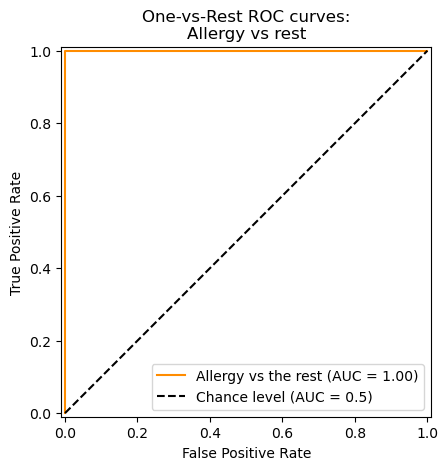

In [26]:
class_id
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\nAllergy vs rest",
)


In [27]:
train_data['prognosis']= label_encoder.fit_transform(train_data['prognosis']) 
value=list(train_data['prognosis'].unique()) 
lables=pd.DataFrame(value,label).sort_values(by=0).reset_index()['index'].to_list()

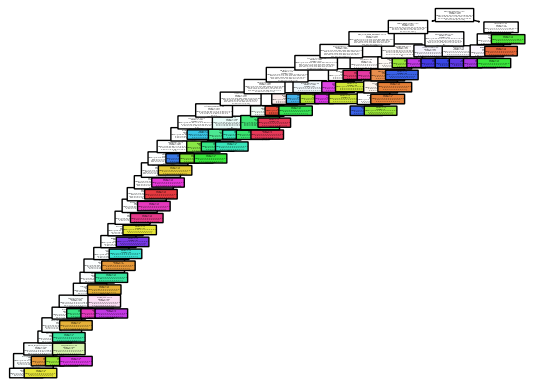

In [28]:
plot_tree(model,feature_names=X.columns, class_names=lables,filled=True, rounded=True)
plt.show()

In [29]:
confusion_matrix(y_test,model.predict(x_test))

array([[18,  0,  0, ...,  0,  0,  0],
       [ 0, 28,  0, ...,  0,  0,  0],
       [ 0,  0, 28, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 22,  0,  0],
       [ 0,  0,  0, ...,  0, 17,  0],
       [ 0,  0,  0, ...,  0,  0, 22]])

In [30]:
lables

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

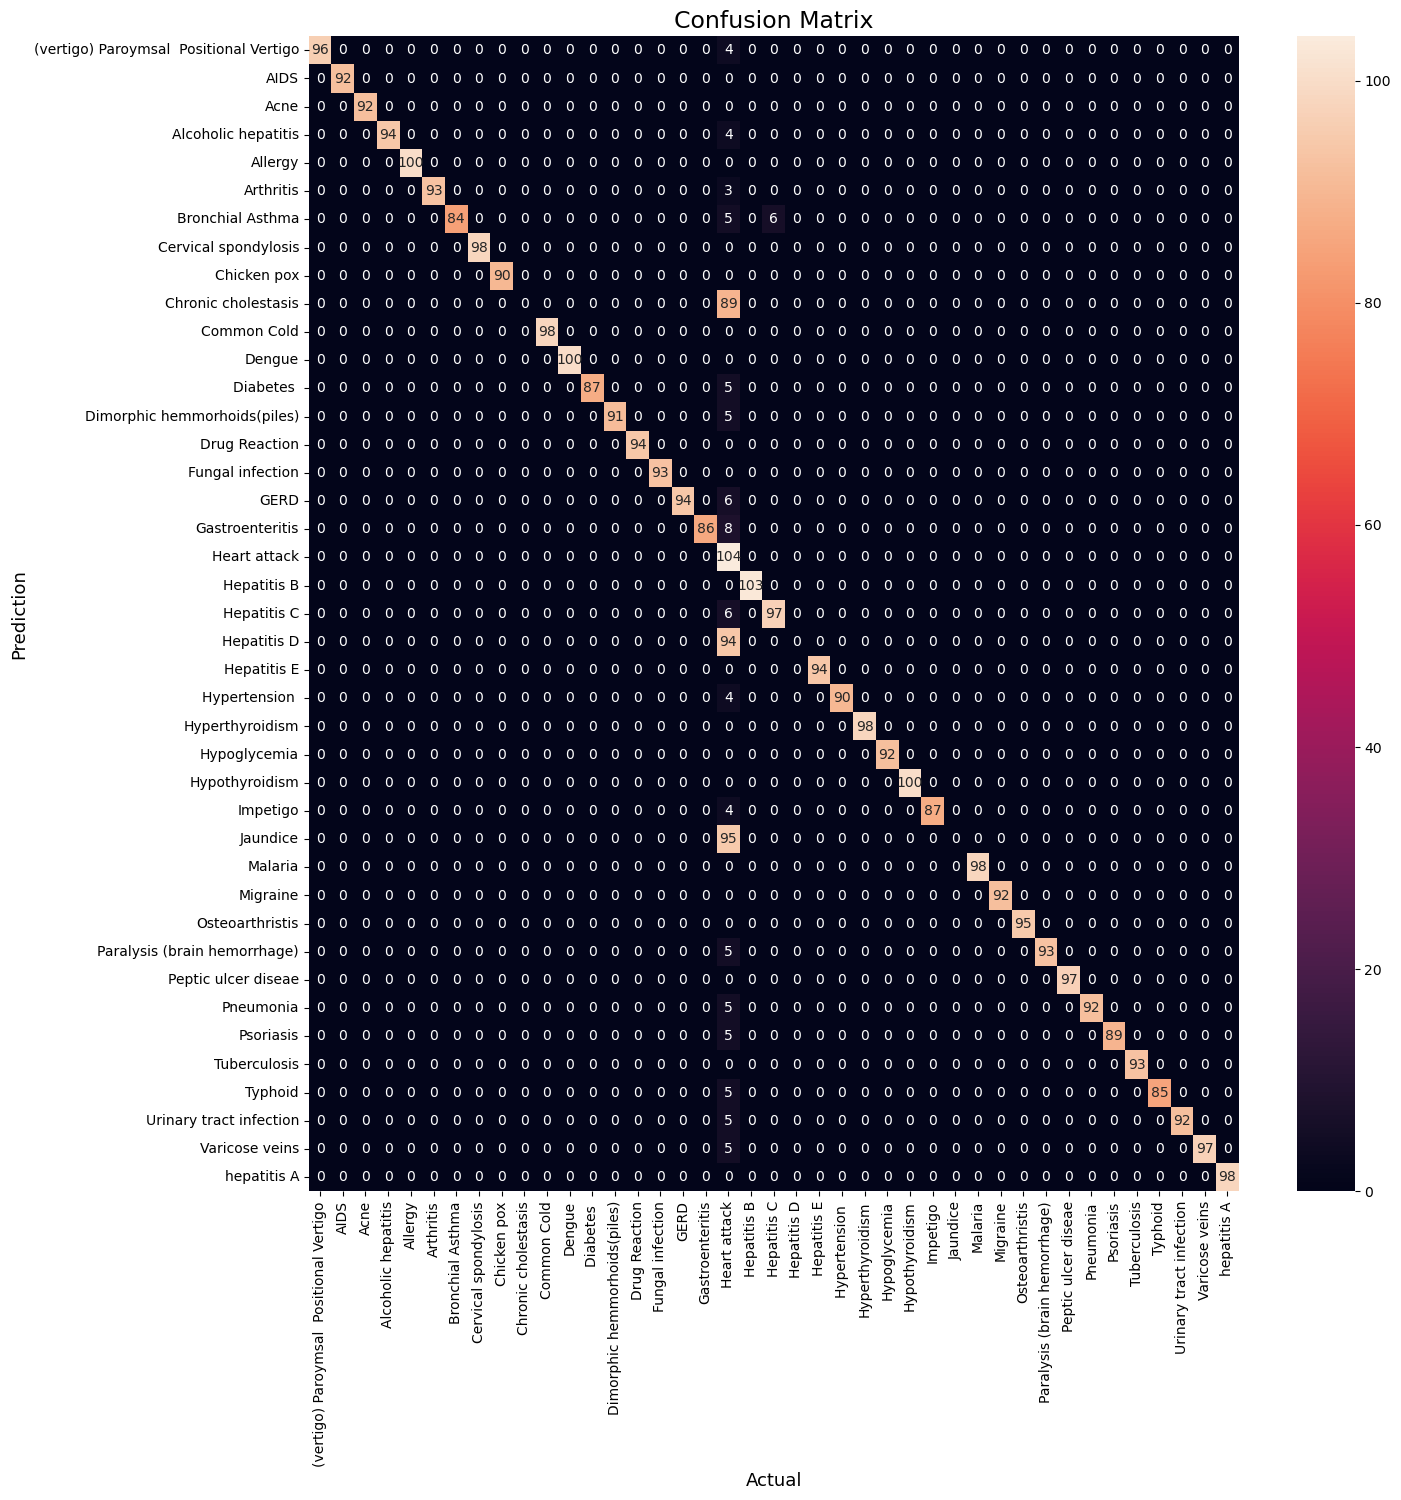

In [31]:
plt.subplots(figsize=(15,15))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,model.predict(x_test)), display_labels = [False, True])
sns.heatmap(confusion_matrix(y_train,y_hat_train),annot=True,fmt='g',
			xticklabels=lables,
			yticklabels=lables)
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()



In [32]:
RF_model=RandomForestClassifier(n_estimators=10,max_features=5,random_state=42)
RF_model.fit(x_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=10, random_state=42)

In [33]:
y_hat_train_RF=RF_model.predict(x_train)
accuracy_score(y_train,y_hat_train_RF)

0.9263211382113821

In [34]:
y_hat_test_RF=RF_model.predict(x_test)
accuracy_score(y_test,y_hat_test_RF)

0.9166666666666666

In [35]:
sklearn.metrics.f1_score(y_train,y_hat_train_RF,labels=None,average=None).sum()/41

0.91053422206843

In [36]:
y_test

3324    Chronic cholestasis
4052        Osteoarthristis
682               Pneumonia
4584           Hypoglycemia
3881              Pneumonia
               ...         
1639               Impetigo
4216        Osteoarthristis
1507              Pneumonia
2813           Tuberculosis
744            Hypoglycemia
Name: prognosis, Length: 984, dtype: object

In [37]:
y_hat_test_RF

array(['Heart attack', 'Osteoarthristis', 'Pneumonia', 'Hypoglycemia',
       'Pneumonia', 'hepatitis A', 'Pneumonia', 'Varicose veins',
       'Varicose veins', 'Urinary tract infection', 'Heart attack',
       'Chicken pox', 'Hepatitis E', 'Peptic ulcer diseae',
       'Bronchial Asthma', 'GERD', 'Heart attack', 'Migraine',
       'Heart attack', 'Paralysis (brain hemorrhage)', 'Arthritis',
       'Chicken pox', 'Migraine', 'Psoriasis', 'Cervical spondylosis',
       'AIDS', 'Urinary tract infection', 'Allergy', 'Arthritis',
       'Heart attack', 'AIDS', 'Urinary tract infection', 'Hepatitis E',
       'Common Cold', 'Bronchial Asthma', 'Hepatitis B', 'Hypertension ',
       'Dimorphic hemmorhoids(piles)', 'Diabetes ', 'Dengue',
       'Gastroenteritis', 'Hypoglycemia', 'Varicose veins',
       'Heart attack', 'Bronchial Asthma', 'GERD', 'Acne',
       'Dimorphic hemmorhoids(piles)', 'Osteoarthristis', 'Typhoid',
       'Impetigo', 'Tuberculosis', 'Peptic ulcer diseae', 'Impetigo',


In [38]:
GB_model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=25,max_features=5)
GB_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, random_state=25)

In [39]:
y_hat_train_GB=GB_model.predict(x_train)
accuracy_score(y_train,y_hat_train_GB)

0.9263211382113821

In [40]:
y_hat_test_GB=GB_model.predict(x_test)
accuracy_score(y_test,y_hat_test_GB)

0.9166666666666666

In [43]:
chi2_selector = SelectKBest(chi2, k=110) 
X_new = chi2_selector.fit_transform(X, y) 
selected_features = X.columns[:][chi2_selector.get_support()] 
x1=X[selected_features]
y=train_data['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x1,y,random_state=25,test_size=0.20, shuffle=True)

In [44]:
xgb_train = xgb.DMatrix(x_train, y_train)
xgb_test = xgb.DMatrix(x_test, y_test)
n=50

params = {
	'objective': 'multi:softmax',
    'num_class': 41,
	'max_depth': 10,
	'learning_rate': 0.1,
}
model_xg = xgb.train(params=params,dtrain=xgb_train,num_boost_round=150)



In [45]:
preds = model_xg.predict(xgb_test)
preds = preds.astype(int)
accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 94.0040650406504
